In [1]:
#VISUALISATIONS - import matplot
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6.0, 6.0]

%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
from bokeh.plotting import figure, output_file, show
import pandas as pd
#output_notebook()

output_file('example.html')

pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('..\Assignment\clean_2years_complaints.csv')

In [7]:
df.head(8)

,nature,type,reporting_level,suburb,quarter_ending
0,Animal,Cat,Wandering,GAYTHORNE,2018-12
1,Animal,Dog,Fencing Issues,CHAPEL HILL,2018-12
2,Animal,Attack,Attack On A Person,ASPLEY,2018-12
3,Animal,Attack,Wandering,JAMBOREE HEIGHTS,2018-12
4,Animal,Cat,Wandering,ASHGROVE,2018-12
5,Animal,Other Animal,Wandering,KENMORE,2018-12
6,Animal,Cat,Wandering,MOUNT GRAVATT EAST,2018-12
7,Animal,Cat,Wandering,ACACIA RIDGE,2018-12


In [8]:
df.shape

(17072, 5)

In [9]:
df.describe()

,nature,type,reporting_level,suburb,quarter_ending
count,17072,17072,17072,17072,17072
unique,1,5,25,187,8
top,Animal,Dog,Wandering,INALA,2020-06
freq,17072,8017,7182,563,2784


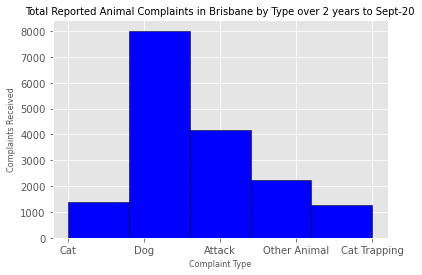

In [10]:
plt.hist(x=df['type'], color='blue', bins=5, edgecolor='black')
plt.title('Total Reported Animal Complaints in Brisbane by Type over 2 years to Sept-20', fontdict={'fontsize': 10})
plt.ylabel('Complaints Received', fontdict={'fontsize': 8})
plt.xlabel('Complaint Type', fontdict={'fontsize': 8})
plt.savefig('Complaints_by_type.png', dpi=500)

In [11]:
#analyze wandering reporting_level as the most frequent
report_l = df.value_counts(['reporting_level', 'suburb'])
report_l.head(20)

reporting_level  suburb           
Wandering        CHERMSIDE            222
                 INALA                178
                 BRACKEN RIDGE        168
                 WYNNUM               138
Fencing Issues   INALA                127
Wandering        YERONGA              120
                 FOREST LAKE          115
                 WEST END             113
                 WYNNUM WEST          108
                 CAMP HILL             94
                 CARINA                91
                 HOLLAND PARK WEST     88
                 THE GAP               83
                 ACACIA RIDGE          80
                 MOUNT COOT-THA        77
                 SANDGATE              77
                 KEPERRA               77
                 WAVELL HEIGHTS        76
                 ASHGROVE              76
                 SUNNYBANK HILLS       74
dtype: int64

In [12]:
report_l = report_l.reset_index()
report_l.columns = ['reporting_level', 'suburb', 'complaints']

In [13]:
report_l.head()

,reporting_level,suburb,complaints
0,Wandering,CHERMSIDE,222
1,Wandering,INALA,178
2,Wandering,BRACKEN RIDGE,168
3,Wandering,WYNNUM,138
4,Fencing Issues,INALA,127


In [14]:
wander = report_l.loc[report_l['reporting_level'] == 'Wandering']
wander

,reporting_level,suburb,complaints
0,Wandering,CHERMSIDE,222
1,Wandering,INALA,178
2,Wandering,BRACKEN RIDGE,168
3,Wandering,WYNNUM,138
5,Wandering,YERONGA,120
...,...,...,...
1768,Wandering,TENNYSON,1
1769,Wandering,RANSOME,1
1770,Wandering,PORT OF BRISBANE,1
1771,Wandering,LAKE MANCHESTER,1


In [15]:
#del wander['reporting_level']

In [16]:
top_10 = wander.head(10)
top_10

,reporting_level,suburb,complaints
0,Wandering,CHERMSIDE,222
1,Wandering,INALA,178
2,Wandering,BRACKEN RIDGE,168
3,Wandering,WYNNUM,138
5,Wandering,YERONGA,120
6,Wandering,FOREST LAKE,115
7,Wandering,WEST END,113
8,Wandering,WYNNUM WEST,108
9,Wandering,CAMP HILL,94
10,Wandering,CARINA,91


In [17]:
#identify to fox complaint suburbs
fox = report_l.loc[report_l['reporting_level'] == 'Fox']
fox

,reporting_level,suburb,complaints
102,Fox,TARRAGINDI,35
138,Fox,CHANDLER,28
140,Fox,BOONDALL,27
173,Fox,MORNINGSIDE,22
174,Fox,KARANA DOWNS,22
...,...,...,...
1933,Fox,BRACKEN RIDGE,1
1934,Fox,BARDON,1
1935,Fox,BANYO,1
1936,Fox,BALMORAL,1


In [18]:
fox_10 = fox.head(10)
fox_10

,reporting_level,suburb,complaints
102,Fox,TARRAGINDI,35
138,Fox,CHANDLER,28
140,Fox,BOONDALL,27
173,Fox,MORNINGSIDE,22
174,Fox,KARANA DOWNS,22
193,Fox,BURBANK,20
203,Fox,PULLENVALE,19
230,Fox,SEVEN HILLS,18
233,Fox,NATHAN,17
234,Fox,UPPER BROOKFIELD,17


In [19]:
fox10_sum = fox_10.reset_index()
fox10_sum

,index,reporting_level,suburb,complaints
0,102,Fox,TARRAGINDI,35
1,138,Fox,CHANDLER,28
2,140,Fox,BOONDALL,27
3,173,Fox,MORNINGSIDE,22
4,174,Fox,KARANA DOWNS,22
5,193,Fox,BURBANK,20
6,203,Fox,PULLENVALE,19
7,230,Fox,SEVEN HILLS,18
8,233,Fox,NATHAN,17
9,234,Fox,UPPER BROOKFIELD,17


In [20]:
#check total fox complaints
total = fox10_sum['complaints'].sum()
total

225

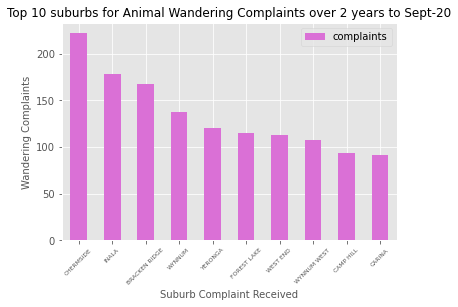

In [21]:
top_10.plot(x = "suburb", y = "complaints", kind = "bar", color="orchid")
plt.title('Top 10 suburbs for Animal Wandering Complaints over 2 years to Sept-20', fontdict={'fontsize': 12})
plt.rcParams["figure.figsize"] = [10,5]
plt.xticks(rotation=45)
plt.ylabel('Wandering Complaints', fontdict={'fontsize': 10})
plt.xlabel('Suburb Complaint Received', fontdict={'fontsize': 10})
plt.xticks(fontsize=6)
plt.savefig('top10_wandering_suburbs.png', dpi=500, bbox_inches = "tight")
plt.show()

In [22]:
#check reporting level total response type counts
reporting_level = df.value_counts(['reporting_level'])
reporting_level

reporting_level      
Wandering                7182
Unregistered             1901
Fencing Issues           1811
Attack On An Animal      1293
Attack On A Person       1019
Fox                       777
Not An Attack             555
Nuisance Animal           437
Too Many Animals          415
Menacing                  360
Defecating In Public      323
Odour                     296
Deer                      195
Wild Dog                  144
Park Patrol Reactive      129
Pest / Feral Animal        74
Rabbit                     59
Insufficient Space         36
Dangerous                  24
Feral Pig                  15
Feral Cat                  13
Surrender                   9
Park Patrol Proactive       2
Dog                         2
Feral Goat                  1
dtype: int64

In [23]:
reporting_24 = reporting_level.reset_index()
reporting_24.columns = ['reporting_level', 'counts']

In [24]:
reporting_24.head(50)

,reporting_level,counts
0,Wandering,7182
1,Unregistered,1901
2,Fencing Issues,1811
3,Attack On An Animal,1293
4,Attack On A Person,1019
5,Fox,777
6,Not An Attack,555
7,Nuisance Animal,437
8,Too Many Animals,415
9,Menacing,360


In [25]:
reporting_24.columns

Index(['reporting_level', 'counts'], dtype='object')

In [26]:
df_2 = pd.read_csv('..\Assignment\complaints_byqtr.csv')

In [27]:
df_2.head

<bound method NDFrame.head of   quarter_ending  total_complaints
0        2019-03              1783
1        2019-12              1827
2        2018-12              1890
3        2019-06              1929
4        2020-03              2128
5        2019-09              2130
6        2020-09              2601
7        2020-06              2784>

In [28]:
df_2 = df_2.sort_values(by ='quarter_ending', ascending=True)
df_2

,quarter_ending,total_complaints
2,2018-12,1890
0,2019-03,1783
3,2019-06,1929
5,2019-09,2130
1,2019-12,1827
4,2020-03,2128
7,2020-06,2784
6,2020-09,2601


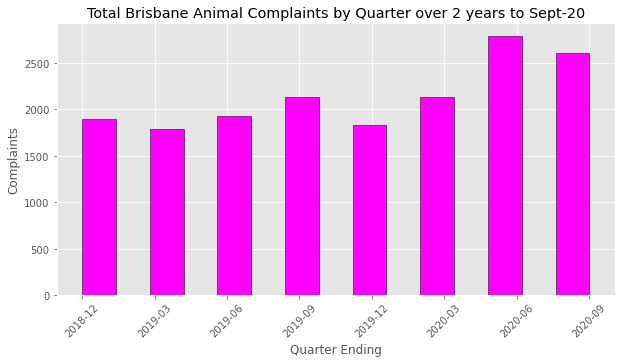

In [29]:
plt.hist(x=df['quarter_ending'], color='magenta', bins=15, edgecolor='black')
plt.title('Total Brisbane Animal Complaints by Quarter over 2 years to Sept-20')
plt.xlabel('Quarter Ending')
plt.xticks(rotation=45)
plt.ylabel('Complaints')
plt.savefig('Total_complaints_by_qtr.png', dpi=500, bbox_inches = "tight")

In [30]:
# create dataframe for total complaints Year - on - Year 
data_y = {'Year 2018-19':[1890, 1783, 1929, 2130], 
        'Year 2019-20':[1827, 2128, 2784, 2601]} 
  
df_yoy = pd.DataFrame(data_y, index =['Oct to Dec', 
                                    'Jan to Mar', 
                                    'Apr to Jun', 
                                    'Jul to Sep']) 
df_yoy

,Year 2018-19,Year 2019-20
Oct to Dec,1890,1827
Jan to Mar,1783,2128
Apr to Jun,1929,2784
Jul to Sep,2130,2601


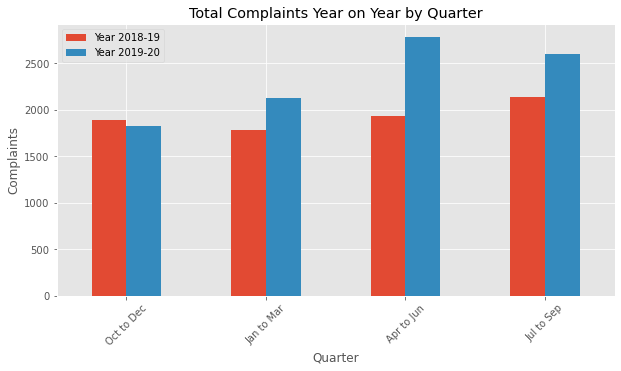

In [31]:
df_yoy.plot(kind="bar")
plt.title("Total Complaints Year on Year by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Complaints")
plt.xticks(rotation=45)
plt.savefig('Total_complaints_YoY_qtr.png', dpi=500, bbox_inches = "tight")

In [32]:
yoy_percent = df_yoy

In [33]:
yoy_percent["Year-on-Year changes by quarter"] = yoy_percent["Year 2019-20"] - yoy_percent["Year 2018-19"]

In [34]:
yoy_percent["% Year-on-Year changes by quarter"] = (yoy_percent["Year-on-Year changes by quarter"] / yoy_percent["Year 2018-19"])*100 
yoy_percent.head()

,Year 2018-19,Year 2019-20,Year-on-Year changes by quarter,% Year-on-Year changes by quarter
Oct to Dec,1890,1827,-63,-3.333333
Jan to Mar,1783,2128,345,19.349411
Apr to Jun,1929,2784,855,44.323484
Jul to Sep,2130,2601,471,22.112676


In [35]:
df_att = pd.read_csv(r'..\Assignment\all_attacksf.csv')
df_att

,Unnamed: 0,quarter_ending,attacks
0,5,2018-12,480
1,4,2019-03,483
2,1,2019-06,562
3,0,2019-09,597
4,7,2019-12,467
5,6,2020-03,476
6,2,2020-06,549
7,3,2020-09,544


In [36]:
del df_att['Unnamed: 0']

In [37]:
df_att.head(8)

,quarter_ending,attacks
0,2018-12,480
1,2019-03,483
2,2019-06,562
3,2019-09,597
4,2019-12,467
5,2020-03,476
6,2020-06,549
7,2020-09,544


In [38]:
df_att.dtypes

quarter_ending    object
attacks            int64
dtype: object

In [39]:
df_att.columns

Index(['quarter_ending', 'attacks'], dtype='object')

In [40]:
df_att.info

<bound method DataFrame.info of   quarter_ending  attacks
0        2018-12      480
1        2019-03      483
2        2019-06      562
3        2019-09      597
4        2019-12      467
5        2020-03      476
6        2020-06      549
7        2020-09      544>

In [41]:
df_att.set_index('quarter_ending',drop=True,inplace=True)

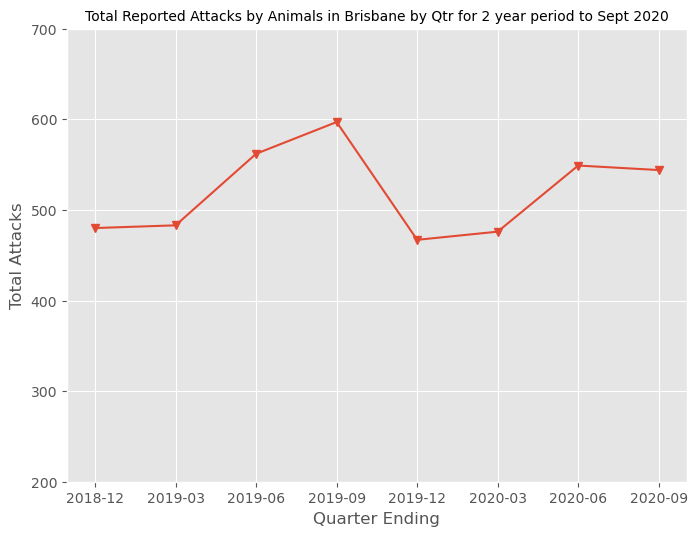

In [42]:
# Create the fig and ax objects
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))

# add data to the ax object
ax.plot(df_att.index, df_att['attacks'],label='Total Attacks', marker='v')
        
ax.set_xlabel("Quarter Ending")
ax.set_ylabel("Total Attacks")  

ax.set_ylim(200, 700)

ax.set_title('Total Reported Attacks by Animals in Brisbane by Qtr for 2 year period to Sept 2020', fontdict={'fontsize': 10})
        
fig.savefig('total_attacks_graph_f.png', dpi=500)        
        
plt.show()

In [43]:
df = pd.read_csv(r'..\Assignment\two_years_complaints_percap.csv')
df

,suburb,complaints,attacks,population,complaint % of Pop,attacks % of Pop
0,INALA,563.0,144.0,14852.0,3.79,0.97
1,BRACKEN RIDGE,330.0,88.0,16935.0,1.95,0.52
2,CHERMSIDE,304.0,35.0,9315.0,3.26,0.38
3,FOREST LAKE,293.0,69.0,22898.0,1.28,0.30
4,WYNNUM,258.0,64.0,12910.0,2.00,0.50
...,...,...,...,...,...,...
133,SUMNER,19.0,3.0,590.0,3.22,0.51
134,FORTITUDE VALLEY,18.0,3.0,6974.0,0.26,0.04
135,RANSOME,14.0,4.0,405.0,3.46,0.99
136,YEERONGPILLY,10.0,2.0,1934.0,0.52,0.10


In [44]:
df.columns

Index(['suburb', 'complaints', 'attacks', 'population', 'complaint % of Pop',
       'attacks % of Pop'],
      dtype='object')

In [45]:
df = df.sort_values(by ='complaint % of Pop', ascending=False)
df.head(10)

,suburb,complaints,attacks,population,complaint % of Pop,attacks % of Pop
64,MOUNT COOT-THA,86.0,5.0,0.0,inf,inf
131,KARAWATHA,23.0,4.0,16.0,143.75,25.00
53,NUDGEE BEACH,97.0,19.0,266.0,36.47,7.14
63,UPPER BROOKFIELD,87.0,7.0,784.0,11.10,0.89
132,WILLAWONG,19.0,4.0,179.0,10.61,2.23
125,KHOLO,30.0,4.0,394.0,7.61,1.02
129,PINKENBA,27.0,10.0,369.0,7.32,2.71
118,PALLARA,33.0,16.0,514.0,6.42,3.11
19,ELLEN GROVE,174.0,42.0,2902.0,6.00,1.45
117,PINJARRA HILLS,35.0,5.0,604.0,5.79,0.83


In [46]:
df.tail(10)

,suburb,complaints,attacks,population,complaint % of Pop,attacks % of Pop
103,KELVIN GROVE,46.0,18.0,7926.0,0.58,0.23
136,YEERONGPILLY,10.0,2.0,1934.0,0.52,0.10
122,AUCHENFLOWER,30.0,7.0,5873.0,0.51,0.12
119,SINNAMON PARK,33.0,9.0,6415.0,0.51,0.14
90,ST LUCIA,60.0,5.0,12575.0,0.48,0.04
105,BRISBANE CITY,43.0,8.0,9461.0,0.45,0.08
113,TARINGA,36.0,12.0,8374.0,0.43,0.14
124,SOUTH BRISBANE,30.0,10.0,7200.0,0.42,0.14
137,CHUWAR,8.0,3.0,2245.0,0.36,0.13
134,FORTITUDE VALLEY,18.0,3.0,6974.0,0.26,0.04


In [47]:
df = df.sort_values(by ='attacks % of Pop', ascending=False)
df.head(15)

,suburb,complaints,attacks,population,complaint % of Pop,attacks % of Pop
64,MOUNT COOT-THA,86.0,5.0,0.0,inf,inf
131,KARAWATHA,23.0,4.0,16.0,143.75,25.00
53,NUDGEE BEACH,97.0,19.0,266.0,36.47,7.14
118,PALLARA,33.0,16.0,514.0,6.42,3.11
129,PINKENBA,27.0,10.0,369.0,7.32,2.71
132,WILLAWONG,19.0,4.0,179.0,10.61,2.23
19,ELLEN GROVE,174.0,42.0,2902.0,6.00,1.45
125,KHOLO,30.0,4.0,394.0,7.61,1.02
135,RANSOME,14.0,4.0,405.0,3.46,0.99
62,ROCHEDALE,89.0,31.0,3170.0,2.81,0.98


In [48]:
from bokeh.models import HoverTool

In [49]:
b2 = figure(
    title='Relationship between total animal complaints & population by suburb in BNE over 2 years',
    x_axis_label='Population by Suburb',
    y_axis_label='Number of Animal Complaints by Suburb'
)
p2 = figure(tools='box_select, lasso_select, reset, save')
b2.circle(x=df['population'], y=df['complaints'], size=10)

#hover = HoverTool(tooltips=None, mode='hline')
#p2 = figure(tools=[hover, 'crosshair'])
                     
show(b2)

In [50]:
b3 = figure(
    title='Relationship between complaints and attacks by % of suburb populations',
    y_axis_label='total complaints by % of suburb population',
    x_axis_label='attacks by % of suburb population', 
   )
p3 = figure(tools='box_select, lasso_select, reset, save')
b3.circle(x=df['attacks % of Pop'], y=df['complaint % of Pop'], size=4)
show(b3)

In [51]:
b8 = figure(
    title='Relationship between total complaints and % complaints by suburb',
    x_axis_label='total complaints by suburb',
    y_axis_label='% complaints by suburb'   
   )
p8 = figure(tools='box_select, lasso_select, reset, save')
b8.circle(x=df['complaints'], y=df['complaint % of Pop'], size=4)
show(b8)

In [52]:
df_tc = df[df.columns[0:2]]
df_tc

,suburb,complaints
64,MOUNT COOT-THA,86.0
131,KARAWATHA,23.0
53,NUDGEE BEACH,97.0
118,PALLARA,33.0
129,PINKENBA,27.0
...,...,...
105,BRISBANE CITY,43.0
104,TENERIFFE,45.0
128,BOWEN HILLS,28.0
90,ST LUCIA,60.0


In [53]:
df_tc_20 = df_tc.sort_values(["complaints"], ascending=False)
df_tc_20.head()

,suburb,complaints
0,INALA,563.0
1,BRACKEN RIDGE,330.0
2,CHERMSIDE,304.0
3,FOREST LAKE,293.0
4,WYNNUM,258.0


In [54]:
df_tc_20 = df_tc_20.reset_index(drop=True)

In [55]:
df_tc_top20 = df_tc_20.head(20)
df_tc_top20

,suburb,complaints
0,INALA,563.0
1,BRACKEN RIDGE,330.0
2,CHERMSIDE,304.0
3,FOREST LAKE,293.0
4,WYNNUM,258.0
5,WYNNUM WEST,223.0
6,ACACIA RIDGE,223.0
7,ZILLMERE,215.0
8,TARRAGINDI,204.0
9,SUNNYBANK HILLS,200.0


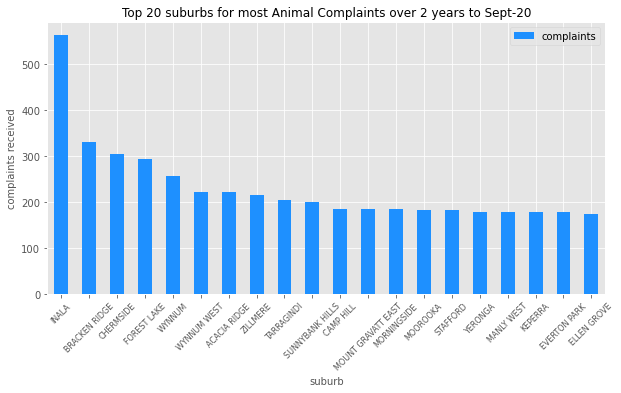

In [56]:
df_tc_top20.plot(x = "suburb", y = "complaints", kind = "bar", color="dodgerblue")
plt.title('Top 20 suburbs for most Animal Complaints over 2 years to Sept-20', fontdict={'fontsize': 12})
plt.rcParams["figure.figsize"] = [10,5]
plt.xticks(rotation=45)
plt.ylabel('complaints received', fontdict={'fontsize': 10})
plt.xlabel('suburb', fontdict={'fontsize': 10})
plt.xticks(fontsize=8)
plt.savefig('top_20_complaint_suburbs.png', dpi=500, bbox_inches = "tight")
plt.show()

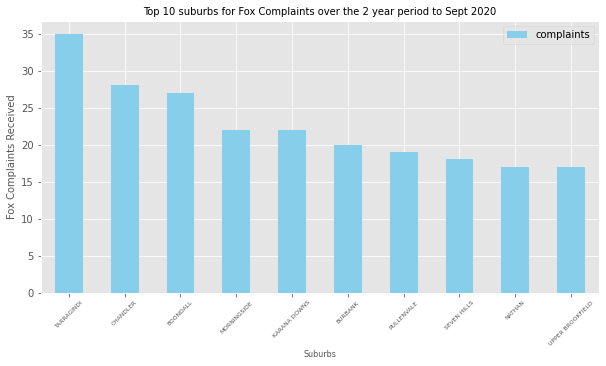

In [57]:
fox_10.plot(x = "suburb", y = "complaints", kind = "bar", color="skyblue")
plt.title('Top 10 suburbs for Fox Complaints over the 2 year period to Sept 2020', fontdict={'fontsize': 10})
plt.rcParams["figure.figsize"] = [10,5]
plt.xticks(rotation=45)
plt.ylabel('Fox Complaints Received', fontdict={'fontsize': 10})
plt.xticks(fontsize=6)
plt.xlabel('Suburbs', fontdict={'fontsize': 8})
plt.savefig('top10fox_complaints.png', dpi=500, bbox_inches = "tight")
plt.show()

In [62]:
#add new column just for interest to find out the total average number of complaints per day by suburb 
df["Average complaints per day"] = (df["complaints"] / 720).round(2)
df.head()

,suburb,complaints,attacks,population,complaint % of Pop,attacks % of Pop,Average complaints per day
0,INALA,563.0,144.0,14852.0,3.79,0.97,0.78
1,BRACKEN RIDGE,330.0,88.0,16935.0,1.95,0.52,0.46
2,CHERMSIDE,304.0,35.0,9315.0,3.26,0.38,0.42
3,FOREST LAKE,293.0,69.0,22898.0,1.28,0.30,0.41
4,WYNNUM,258.0,64.0,12910.0,2.00,0.50,0.36


In [61]:
#re order to check top complaint suburbs down
df = df.sort_values(by ='complaints', ascending=False)
df.head(10)

,suburb,complaints,attacks,population,complaint % of Pop,attacks % of Pop,Average complaints per day
0,INALA,563.0,144.0,14852.0,3.79,0.97,0.78
1,BRACKEN RIDGE,330.0,88.0,16935.0,1.95,0.52,0.46
2,CHERMSIDE,304.0,35.0,9315.0,3.26,0.38,0.42
3,FOREST LAKE,293.0,69.0,22898.0,1.28,0.30,0.41
4,WYNNUM,258.0,64.0,12910.0,2.00,0.50,0.36
5,WYNNUM WEST,223.0,52.0,12288.0,1.81,0.42,0.31
6,ACACIA RIDGE,223.0,64.0,7430.0,3.00,0.86,0.31
7,ZILLMERE,215.0,63.0,8968.0,2.40,0.70,0.30
8,TARRAGINDI,204.0,67.0,10784.0,1.89,0.62,0.28
9,SUNNYBANK HILLS,200.0,58.0,18087.0,1.11,0.32,0.28


In [ ]:
#end of analysis